# Simulated Zeipel-Kozai-Lidiv (ZLK) oscillations of Earth

Figure 2.10 from Chapter 2 of Ryden, *Celestial and Stellar Dynamics*, Cambridge University Press.

Computed von Zeipel-Lidov-Kozai (ZLK) mechanism oscillations for the Earth ($a_\mathrm{in} = 1$au) given a
perturbing tertiary in the outer solar system with $m_3=m_1=1$M$_\odot$, $a_\mathrm{out} = 200$au, and $e_\mathrm{out}=0.1$. The initial inclination ofthe Earth's orbit relative to the tertiary's is $i=85^\circ$.

Data from a model calculated for the book by Prof. Todd Thompson, OSU Astronomy Dept.

In [2]:
%matplotlib inline

import math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, LogLocator, NullFormatter

# supress nuissance warnings

import warnings
warnings.filterwarnings('ignore',category=UserWarning, append=True)
warnings.filterwarnings('ignore',category=RuntimeWarning, append=True)

## Standard Plot Format

Setup the standard plotting format and make the plot.  

In [3]:
plotFile = 'Fig2_10.png' 

# graphic aspect ratio = width/height

aspect = 4.0/3.0

#
# Don't change these unless you really need to (we never have)
#
# fPage is the horizontal fraction of the page occupied by the figure, default 1.0
#
# scaleFac is the LaTeX includegraphics scaling in units of \textwidth, default 1.0
#

fPage = 1.0
scaleFac = 0.85

# Text width in inches - don't change, this is defined by the print layout

textWidth = 6.0 # inches

# Graphic dimensions depending on bitmap or vector format (draft vs production)

dpi = 600
plotWidth = dpi*fPage*textWidth
plotHeight = plotWidth/aspect
axisFontSize = 12
labelFontSize = 10
lwidth = 0.5
axisPad = 5
wInches = fPage*textWidth # float(plotWidth)/float(dpi)
hInches = wInches/aspect  # float(plotHeight)/float(dpi)
    
# LaTeX is used throughout for markup of symbols, Times-Roman serif font

plt.rc('text', usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times-Roman'],'weight':'bold','size':'16'})

# Font and line weight defaults for axes

matplotlib.rc('axes',linewidth=lwidth)
matplotlib.rcParams.update({'font.size':axisFontSize})

# axis and label padding

plt.rcParams['xtick.major.pad']=f'{axisPad}'
plt.rcParams['ytick.major.pad']=f'{axisPad}'
plt.rcParams['axes.labelpad'] = f'{axisPad}'

## Model calculation data

Model data in a 3-column ascii text file as follows:
 * `time` = time in Myr
 * `inc` = orbital inclination in degrees
 * `ecc` = orbital eccentricity

The calculation runs from 0 to 100 Myr.

In [4]:
dataFile = 'Earth_ZLK.txt' 

data = pd.read_csv(dataFile,sep=r'\s+',comment='#')

tMyr = np.array(data['time']) # time in Myr
inc = np.array(data['inc']) # orbital inclination in degrees
ecc = np.array(data['ecc']) # orbital eccentricity

# plotting limits

tMin = 0.0 # Myr
tMax = 100

iMin = 62
iMax = 90

eMin = -0.05
eMax = 1.05

## Figure 2.10

Plot the inclination and eccentricity versus time in a 2-panel over/under format plot

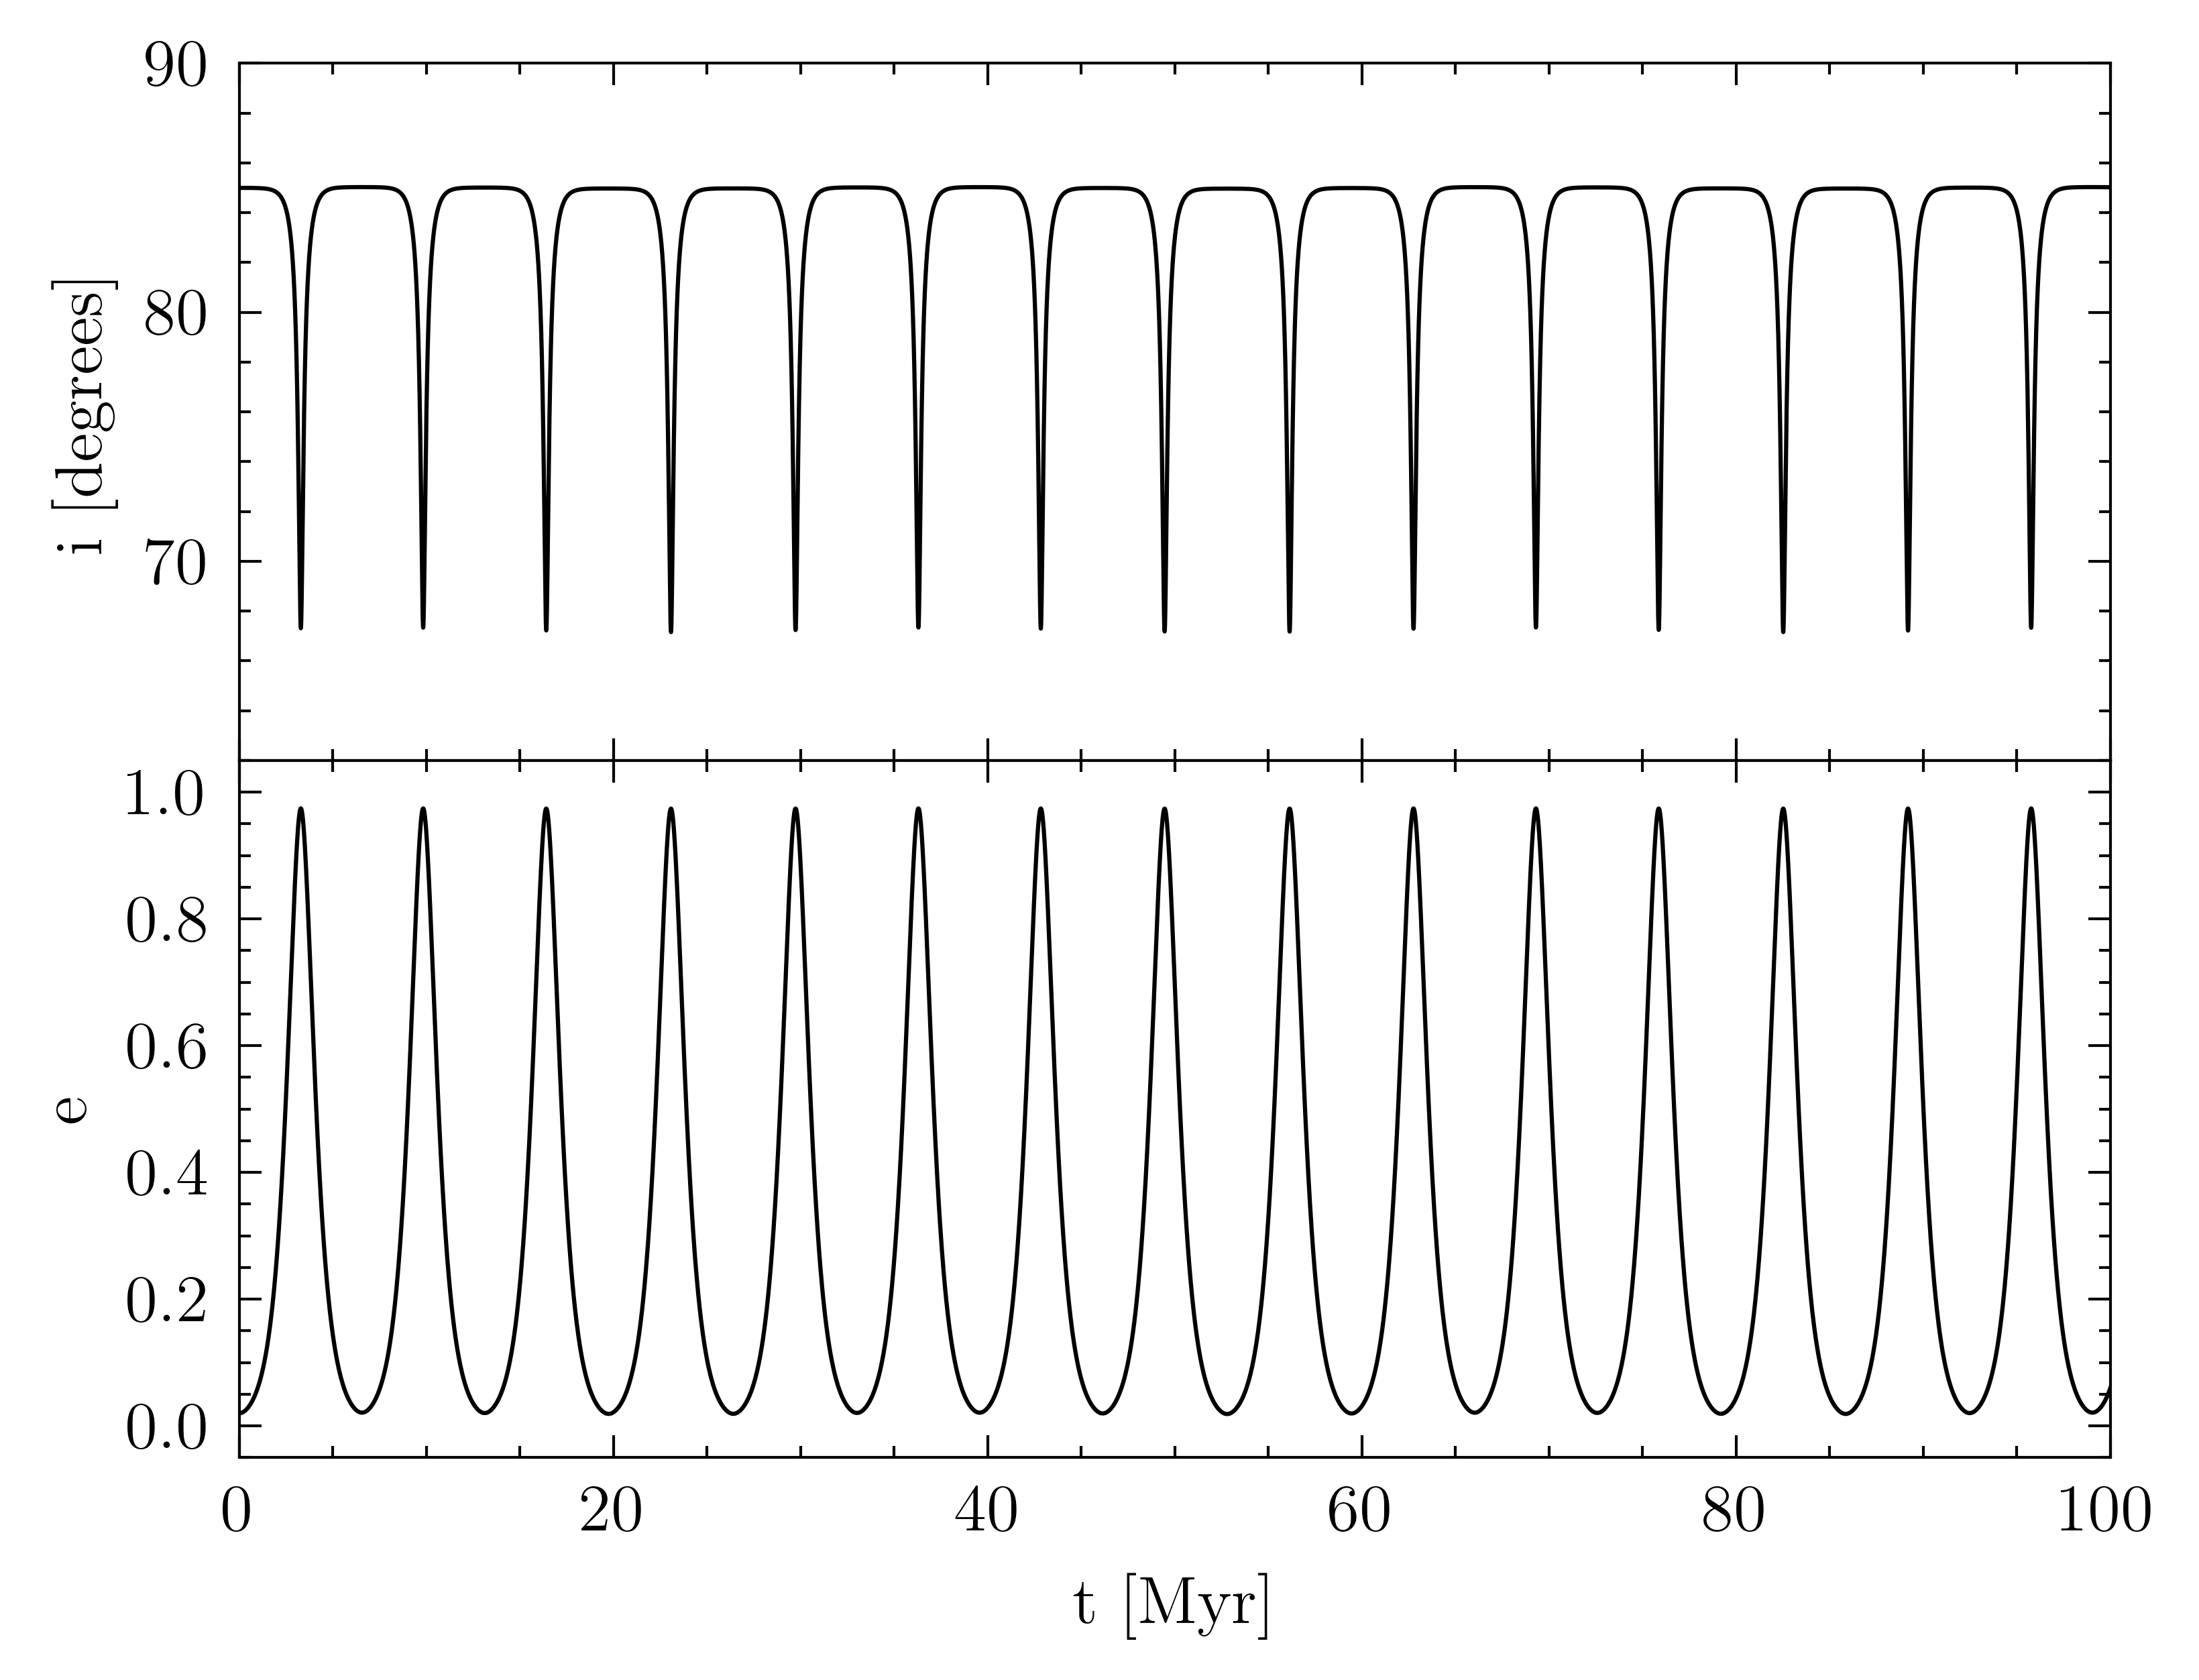

In [5]:
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(wInches,hInches),dpi=dpi)

fig.subplots_adjust(wspace=0, hspace=0)

# Top Panel: inclination

ax1.tick_params('both',length=4,width=lwidth,which='major',direction='in',top='on',right='on')
ax1.tick_params('both',length=2,width=lwidth,which='minor',direction='in',top='on',right='on')

ax1.set_xlim(tMin,tMax)
ax1.xaxis.set_major_locator(MultipleLocator(20))
ax1.xaxis.set_minor_locator(MultipleLocator(5))
ax1.set_xticklabels([])

ax1.set_ylim(iMin,iMax)
ax1.yaxis.set_major_locator(MultipleLocator(10))
ax1.yaxis.set_minor_locator(MultipleLocator(2))
ax1.set_ylabel(r'i [degrees]',fontsize=axisFontSize)

ax1.plot(tMyr,inc,'-',color='black',lw=0.75,zorder=8)

# Bottom panel: eccentricity

ax2.tick_params('both',length=4,width=lwidth,which='major',direction='in',top='on',right='on')
ax2.tick_params('both',length=2,width=lwidth,which='minor',direction='in',top='on',right='on')

ax2.set_xlim(tMin,tMax)
ax2.xaxis.set_major_locator(MultipleLocator(20))
ax2.xaxis.set_minor_locator(MultipleLocator(5))
ax2.set_xlabel(r't [Myr]',fontsize=axisFontSize)

ax2.set_ylim(eMin,eMax)
ax2.yaxis.set_major_locator(MultipleLocator(0.2))
ax2.yaxis.set_minor_locator(MultipleLocator(0.05))
ax2.set_ylabel(r'e',fontsize=axisFontSize)

ax2.plot(tMyr,ecc,'-',color='black',lw=0.75,zorder=8)

plt.plot()

plt.savefig(plotFile,bbox_inches='tight',facecolor='white')